Dataset of wine given and we are required to do 
1.Optimum no of clusters in each model
2.Model using the found no of clusters
3.Implement model using DBSCAN


Steps involved
1.)Reading data 
2.)Data Analysis 
3.)Required preprocessing 
4.)Using KMeans ,finding no of optimum clusters and implementing model using it and find silhouette score
5.)Using KMeans with PCA ,finding no of optimum clusters and implementing model using it and find silhouette score
6.)Using Agglomerative clustering ,finding no of optimum clusters and implementing model using it and find silhouette score 
7.)Implementing DBSCAN clustering

In [272]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
#Reading data
df=pd.read_csv('Wine_clust.csv')

EDA and preprocessing

In [274]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [276]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [277]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


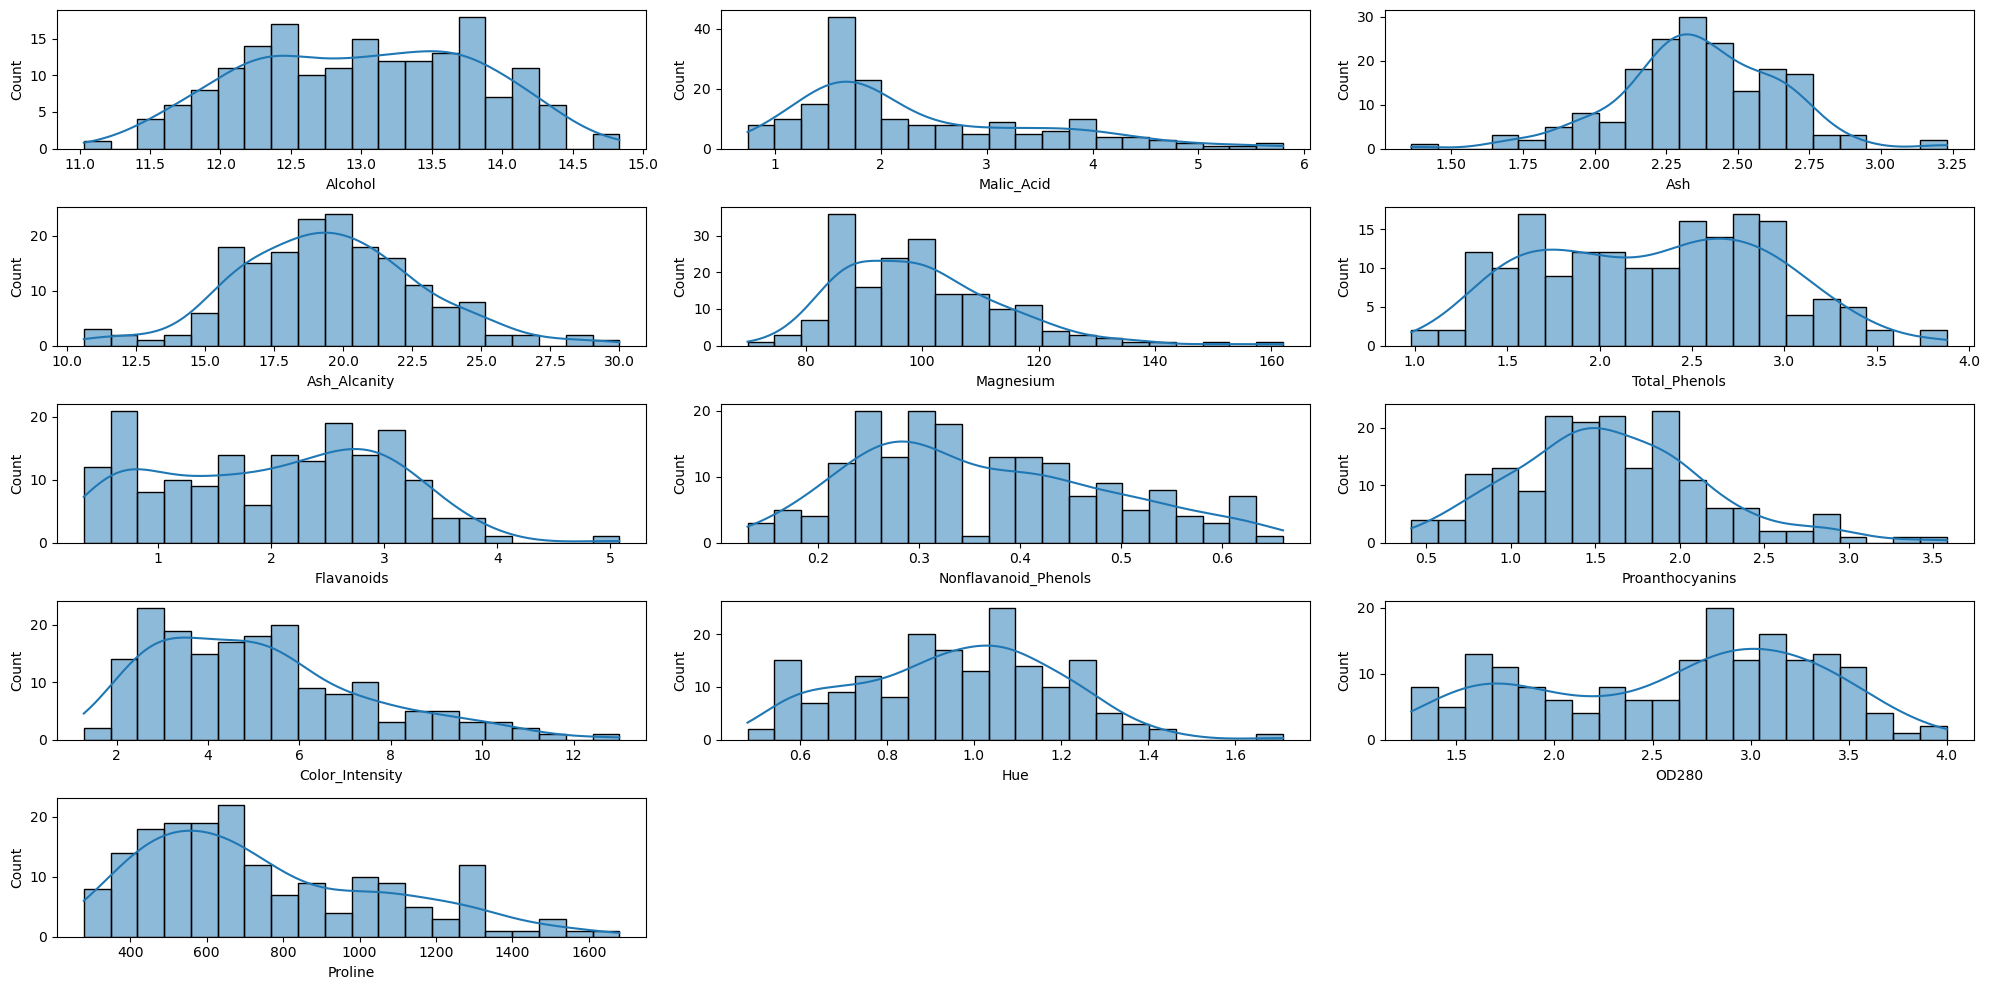

In [278]:
#For checking the distribution
features=df.columns.to_list()
plt.figure(figsize=(20,10))
for i in range(0,len(features)):
    plt.subplot(5,3,i+1)
    sns.histplot(x=df[features[i]],kde=True,bins=20)
    plt.tight_layout()

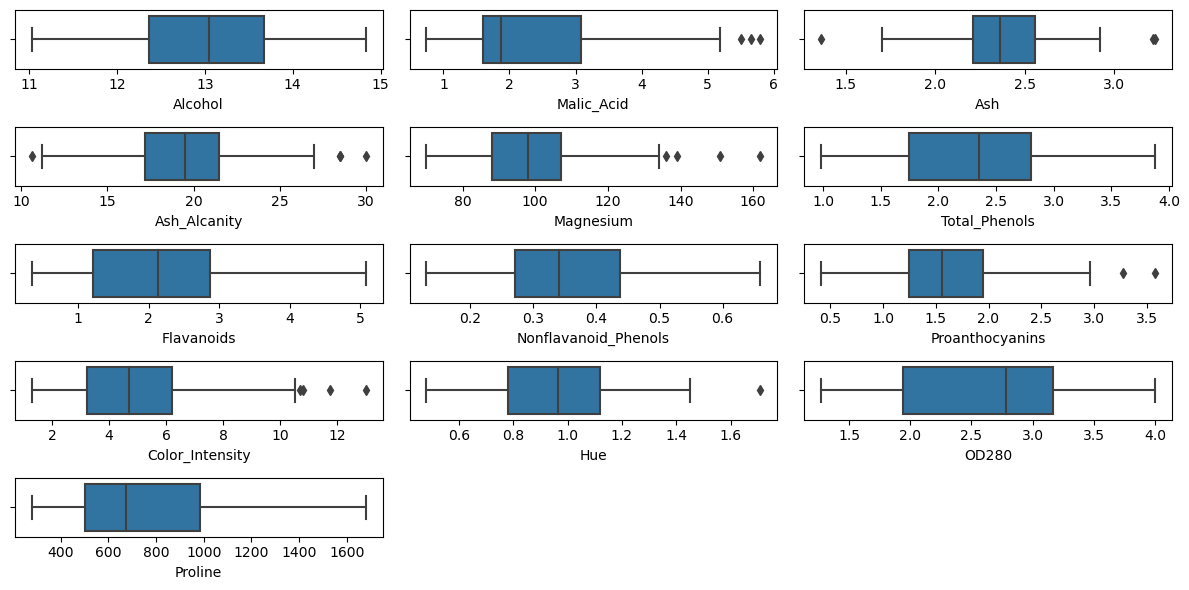

In [279]:
#For checking outliers
for i in range(0,len(features)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=df[features[i]])
    plt.tight_layout()

In [280]:
#Scaling the dataframe
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=df.copy()
df_scaled=scaler.fit_transform(df_scaled)


KMeans clustering

In [281]:
#Finding wcss for differnt values of no of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,14):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)

C:\Users\Sunitha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sunitha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sunitha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sunitha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

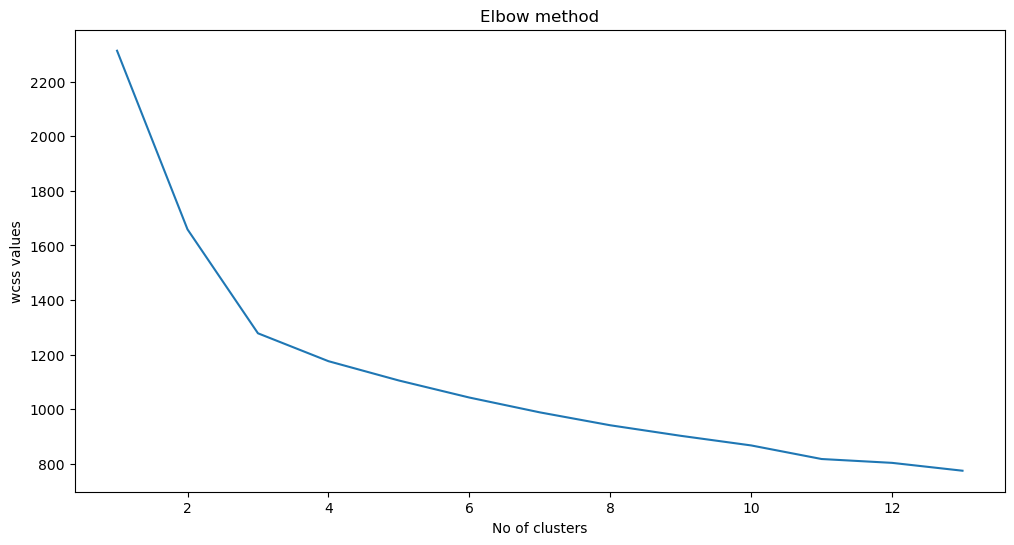

In [282]:
#Using elbow method find the optimum number of clusters
plt.plot(range(1,14),wcss)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('wcss values')
plt.show()

Optimum no of clusters found to be 3

In [283]:
#Implementing model using no of clusters =3
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42,n_init='auto')
labels=kmeans.fit_predict(df)
unique_labels=np.unique(labels)
unique_labels

C:\Users\Sunitha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 1, 2])

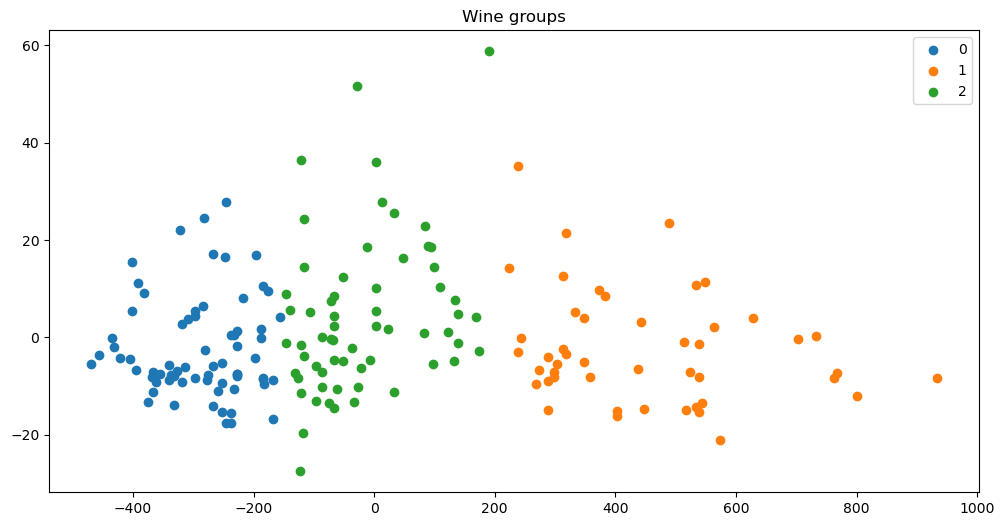

In [284]:
#Visualising the clusters
for i in unique_labels:
    plt.scatter(X[labels==i,0],X[labels==i,1],label=i)
plt.legend()
plt.title('Wine groups')
plt.show()

In [285]:
#Finding Silhouette score
score=silhouette_score(df,labels)
print(f'Silhouette score obtained using KMeans is : {score}')

Silhouette score obtained using KMeans is : 0.571138193786884


PCA with KMeans

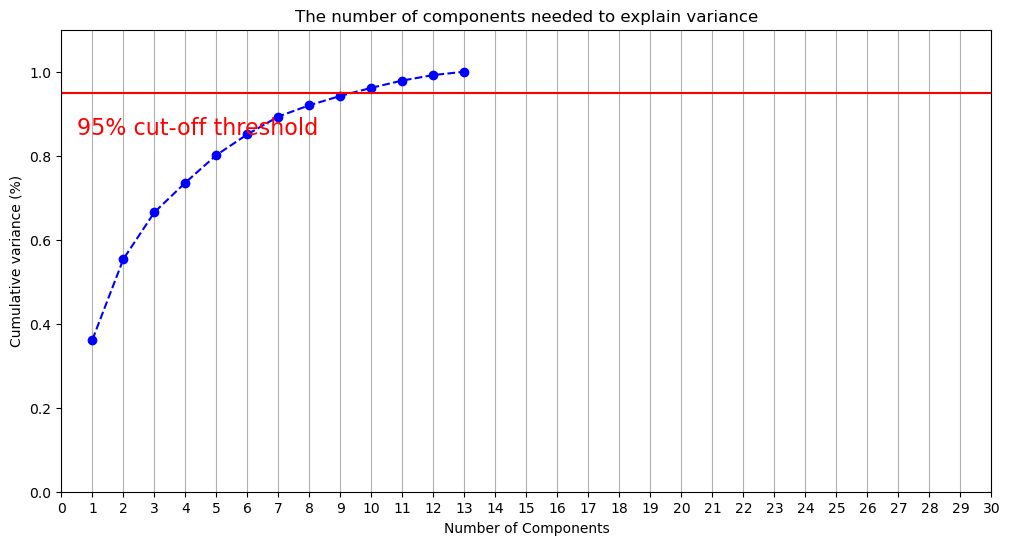

In [286]:
#Applying PCA for reducing the no of dimensions that retain most of the important information
from sklearn.decomposition import PCA
pca = PCA().fit(df_scaled)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 14, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 31, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

From the above plot,no of components can be taken as 9 as it is the minimum number satisfying 95% of cutoff

In [287]:
pca = PCA(n_components=9)
df_pca =pca.fit_transform(df_scaled)

In [288]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df_pca)
  wcss.append(kmeans.inertia_)

C:\Users\Sunitha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sunitha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sunitha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sunitha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

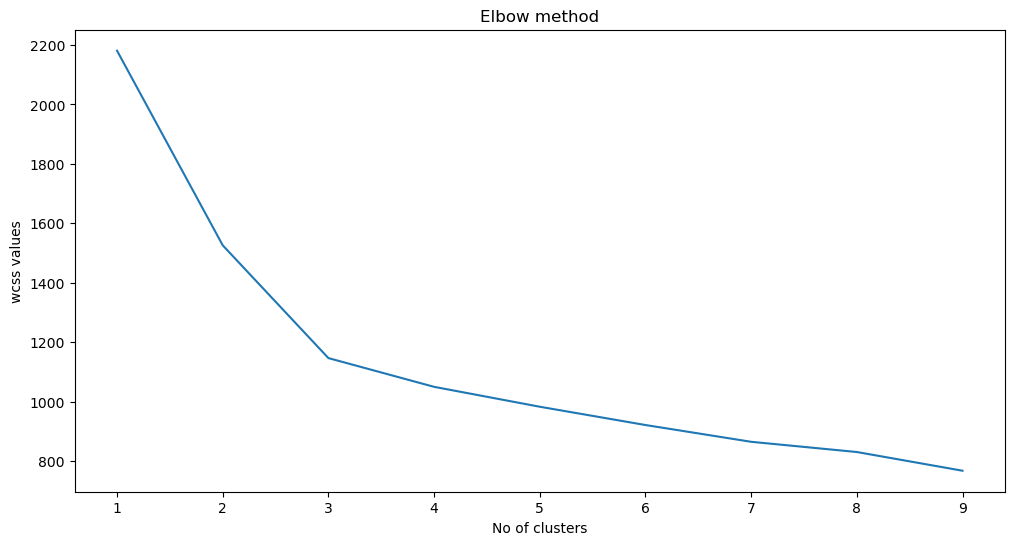

In [289]:
plt.plot(range(1,10),wcss)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('wcss values')
plt.show()

In [290]:
x=df_pca
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42,n_init='auto')
y_pred=kmeans.fit_predict(x)
score=silhouette_score(df_pca,y_pred)
print(f'Silhouette score obtained using PCA with KMeans is : {score}')


Silhouette score obtained using PCA with KMeans is : 0.3068258241534397


C:\Users\Sunitha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Agglomerative clustering-Heirarchial clustering

In [291]:
#Feature selection
#Selecting columns based on significance
df_new=df[['Alcohol','Ash_Alcanity','Magnesium','Color_Intensity','Proline']]

In [292]:
#Applying scaling on selected dataframe
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_nscaled=df_new.copy()
df_nscaled=scaler.fit_transform(df_nscaled)

In [293]:
#Importing necessary libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster


In [294]:
#Applying linkage
mergings = linkage(df_nscaled,method='ward')

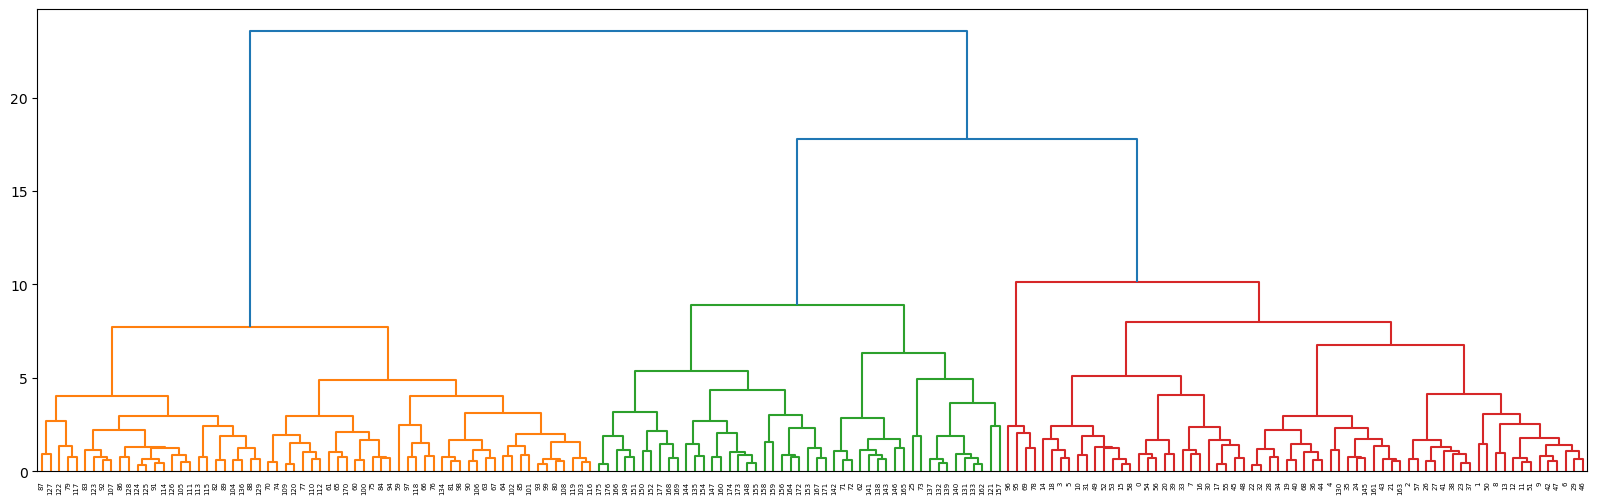

In [295]:
plt.figure(figsize=(20,6))
dendrogram(mergings)
plt.show()

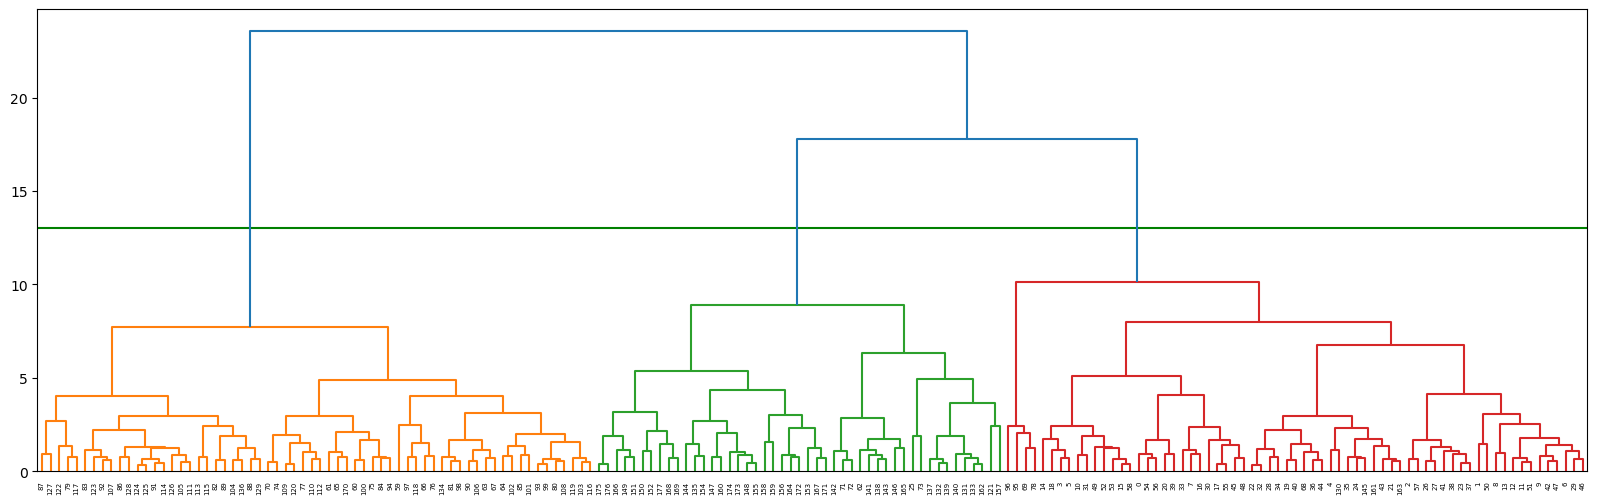

In [296]:
#Midvalue of 13 is chosen from above dendogram
plt.figure(figsize=(20,6))
plt.axhline(13,color='green')
dendrogram(mergings)
plt.show()

As 3 intersection is seen,no of clusters=3 can be taken

In [297]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(df_new)

C:\Users\Sunitha\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [298]:
y_hc

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)

In [299]:
from sklearn.metrics import silhouette_score
score=silhouette_score(df,y_hc)
print(f'Silhouette score obtained using KMeans is : {score}')

Silhouette score obtained using KMeans is : 0.5644796401732071


DBSCAN

In [300]:
#Importing necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [301]:
#Parameters of eps and min_samples is tried in trial and error way and optimum value is chosen based on no of clusters and noise
db_scan=DBSCAN(eps=0.62,min_samples=3)
df_db=db_scan.fit(df_nscaled)
db_clusters = len(set(df_db.labels_)) - (1 if -1 in df_db.labels_ else 0)  
db_noise = list(df_db.labels_).count(-1)
print(f"Estimated number of clusters: {db_clusters}")
print(f"Estimated number of noise points: {db_noise}")
    

Estimated number of clusters: 8
Estimated number of noise points: 142


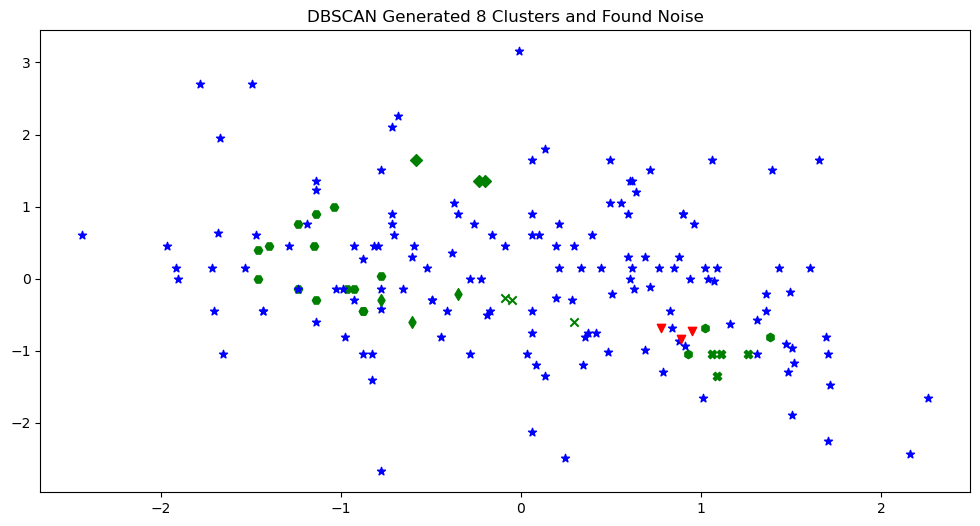

In [302]:
for i in range(0, df_nscaled.shape[0]):
    if db_scan.labels_[i] == 0:
        c1 = plt.scatter(df_nscaled[i,0], df_nscaled[i,1], c = 'r', marker = 'v')
    elif db_scan.labels_[i] == 1:
        c2 = plt.scatter(df_nscaled[i,0], df_nscaled[i,1], c = 'g', marker = 'x')
    elif db_scan.labels_[i] == 2:
        c3 = plt.scatter(df_nscaled[i,0], df_nscaled[i,1], c = 'g', marker = 'X')
    elif db_scan.labels_[i] == 3:
        c4 = plt.scatter(df_nscaled[i,0], df_nscaled[i,1], c = 'g', marker = 'h')
    elif db_scan.labels_[i] == 4:
        c5 = plt.scatter(df_nscaled[i,0], df_nscaled[i,1], c = 'g', marker = 'H')
    elif db_scan.labels_[i] == 5:
        c6 = plt.scatter(df_nscaled[i,0], df_nscaled[i,1], c = 'g', marker = 'd')
    elif db_scan.labels_[i] == 6:
        c7 = plt.scatter(df_nscaled[i,0], df_nscaled[i,1], c = 'g', marker = 'D')
    elif db_scan.labels_[i] == 6:
        c8 = plt.scatter(df_nscaled[i,0], df_nscaled[i,1], c = 'g', marker = '|')
     
    elif db_scan.labels_[i] == -1:
        c9 = plt.scatter(df_nscaled[i,0], df_nscaled[i,1], c = 'b', marker = '*')
plt.title('DBSCAN Generated 8 Clusters and Found Noise')
plt.show()

Summary

1) Data analysis and preprocessing done on dataset of wine parameters given.
2) Machine learning based on KMeans,PCA and Agglomerative heirarchy clustering done on the cleaned dataset.All these algorithms suggested 3 clusters.
3) Silhouette score for each model calculated
4) DBSCAN clustering algorithm also done.8 clusters were suggested and  noise observed on this model
